In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [88]:
#Read the data
startups= pd.read_csv("C:/Users/Anjali/OneDrive/Desktop/data science/50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [89]:
startups.info()  # to get information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [90]:
#check for missing values
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [91]:
startups.corr()  #correlation matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


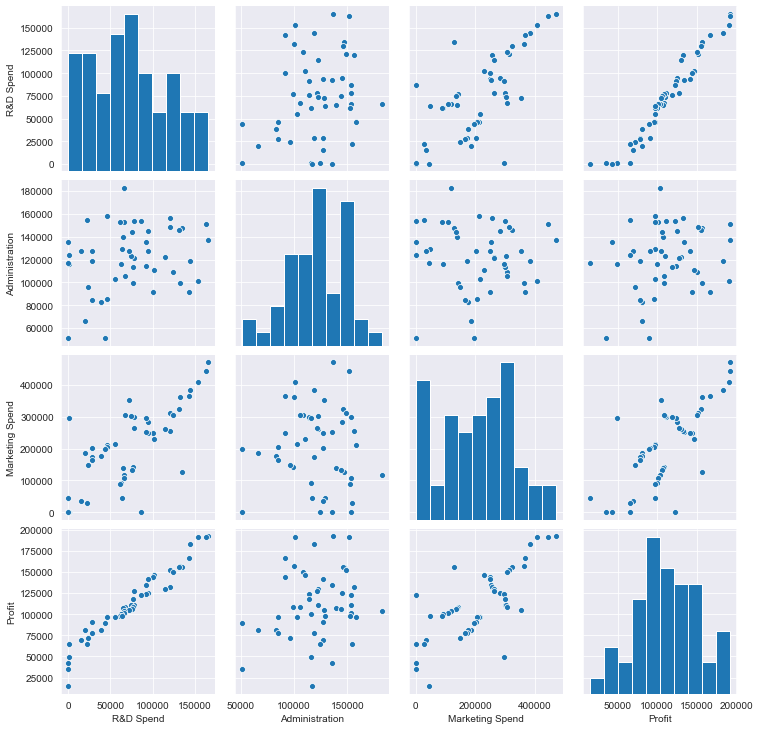

In [92]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [93]:
startups1 = startups.rename({'R&D Spend':'RDS','Administartion':'ADMS','Marketing Spend':'MS'},axis=1)
startups1

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [94]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDS+Administration+MS',data=startups1).fit()


In [95]:
#Coefficients
model.params

Intercept         50122.192990
RDS                   0.805715
Administration       -0.026816
MS                    0.027228
dtype: float64

In [96]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RDS               17.846374
Administration    -0.525507
MS                 1.655077
dtype: float64 
 Intercept         1.057379e-09
RDS               2.634968e-22
Administration    6.017551e-01
MS                1.047168e-01
dtype: float64


In [97]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [98]:
#Model detecting dignostics.
model_influence = model.get_influence()  #Cook's distance.
(c, _) = model_influence.cooks_distance

<ipython-input-99-ac956c196cc8>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startups1)), np.round(c, 3))


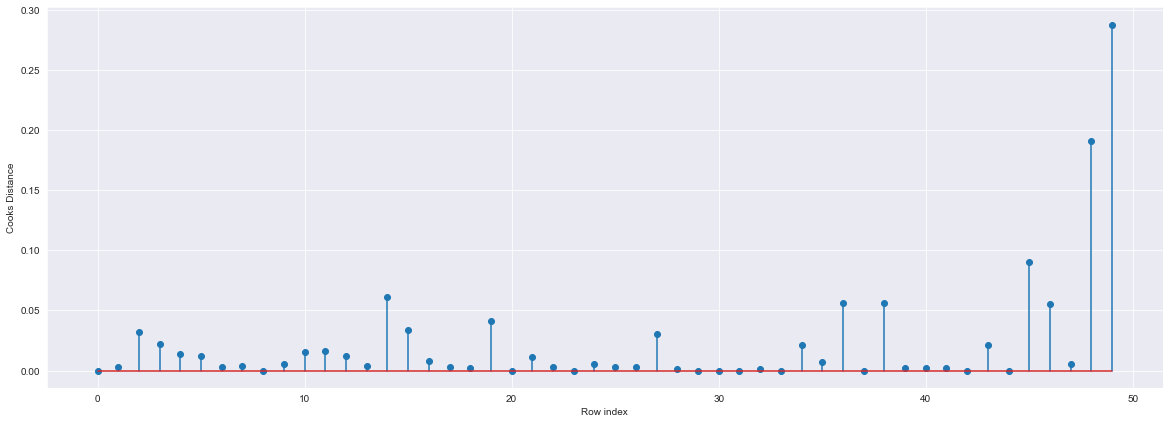

In [99]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [100]:
#index and value of influencer where c is more than 0.05
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

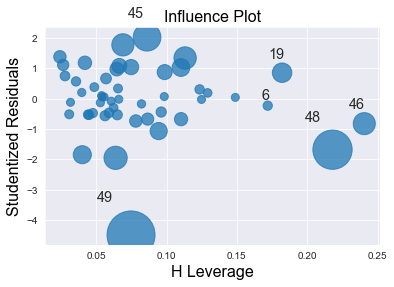

In [101]:
from statsmodels.graphics.regressionplots import influence_plot    #high influence points.
influence_plot(model)
plt.show()

In [125]:
k = startups1.shape[1]
n = startups1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [126]:
startups1[startups.index.isin([49])]  #From the above plot, it is evident that data point 49 is the influencers

,RDS,Administration,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [127]:

startups1.head()

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [128]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startups2=startups1.drop(startups1.index[[49]],axis=0).reset_index()

In [129]:
#Drop the original index
startups_2=startups2.drop(['index'],axis=1)

In [130]:
startups_2

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [131]:
final_ml_V= smf.ols('Profit~RDS+Administration+MS',data = startups_2).fit()
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-132-0f5301796380>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startups_2)),np.round(c_V,3));


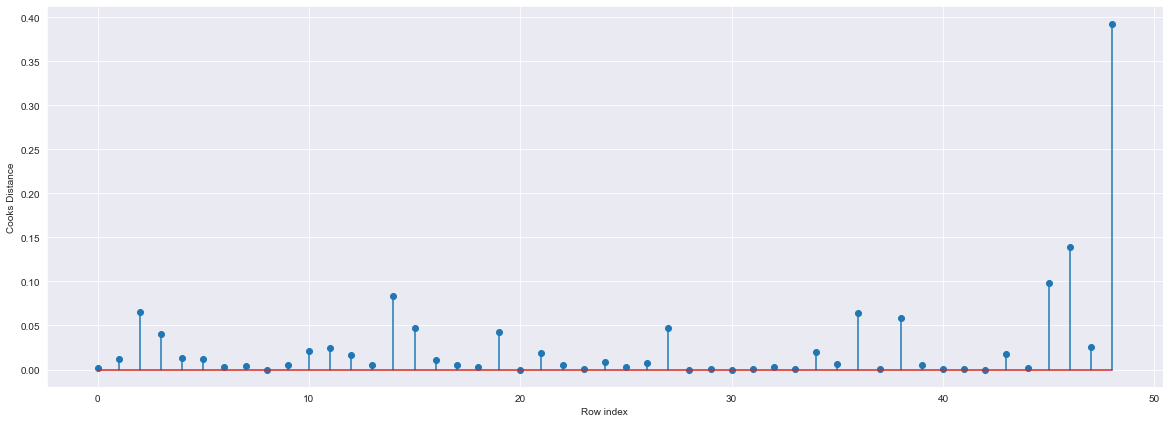

In [132]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups_2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [134]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9613162435129847, 1020.5652974526367)

In [135]:
#New data for prediction
new_data=pd.DataFrame({'RDS':800000.10,"Administration":950000.90,"MS":100000.20},index=[1])

In [136]:
final_ml_V.predict(new_data)

1    660216.064312
dtype: float64

In [139]:
final_ml_V.predict(startups1.iloc[0:5,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
4    170863.486721
dtype: float64

In [140]:
pred_y = final_ml_V.predict(startups1)

In [141]:
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
49     50925.119153
